Model trained with accuracy: 98.39%
Model saved as 'flood_risk_predictor.joblib'

Confusion Matrix:
[[32  0]
 [ 1 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.97      0.98        30

    accuracy                           0.98        62
   macro avg       0.98      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62



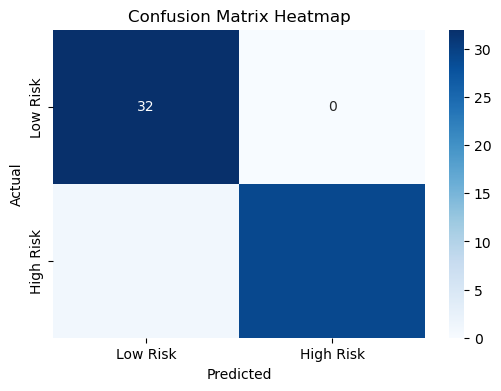

C:\Users\ramas\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


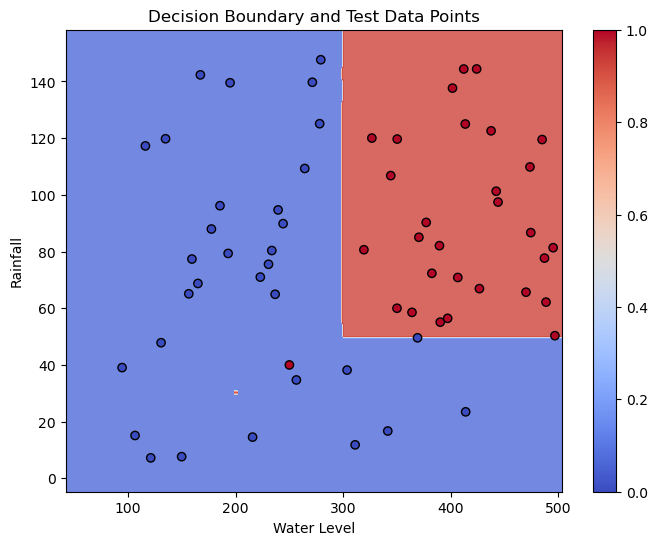

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import joblib

# Function to train and save the model with visualization and evaluation
def train_flood_risk_model():
    """
    Train a Random Forest model for flood risk prediction, visualize results,
    and evaluate using a confusion matrix.
    """

    # Original dataset
    data = pd.DataFrame({
        'water_level': [100, 150, 200, 250, 300, 350, 400],
        'rainfall': [10, 20, 30, 40, 50, 60, 70],
        'flood_risk': [0, 0, 1, 1, 1, 1, 1]
    })

    # Generate synthetic data to enhance dataset diversity
    synthetic_data = pd.DataFrame({
        'water_level': np.random.uniform(50, 500, 300),  # Water level range: 50-500
        'rainfall': np.random.uniform(5, 150, 300)      # Rainfall range: 5-150
    })
    synthetic_data['flood_risk'] = synthetic_data.apply(
        lambda row: 1 if row['water_level'] > 300 and row['rainfall'] > 50 else 0, axis=1
    )

    # Combine original and synthetic data
    complete_data = pd.concat([data, synthetic_data], ignore_index=True)

    # Split features and target variable
    X = complete_data[['water_level', 'rainfall']]  # Features
    y = complete_data['flood_risk']                # Target

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predictions and accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model trained with accuracy: {accuracy * 100:.2f}%")

    # Save the trained model
    joblib.dump(model, 'flood_risk_predictor.joblib')
    print("Model saved as 'flood_risk_predictor.joblib'")

    # Confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Visualization: Confusion Matrix Heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

    # Visualization: Decision Boundary
    plt.figure(figsize=(8, 6))
    x_min, x_max = X_train['water_level'].min() - 10, X_train['water_level'].max() + 10
    y_min, y_max = X_train['rainfall'].min() - 10, X_train['rainfall'].max() + 10
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    scatter = plt.scatter(X_test['water_level'], X_test['rainfall'], c=y_test, cmap='coolwarm', edgecolor='k')
    plt.colorbar(scatter)
    plt.title('Decision Boundary and Test Data Points')
    plt.xlabel('Water Level')
    plt.ylabel('Rainfall')
    plt.show()

# Run the training function
if __name__ == '__main__':
    train_flood_risk_model()
